# 5.0 Data Exploration

In [5]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from wordcloud import WordCloud

In [37]:
news = pd.read_csv('../data/labeled/news_labeled.csv')
news.head()

,title,date,url,article,news_column
0,country first innovation center new power syst...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201939...,photo shows innovation center new power system...,innovation
1,th china beijing international high tech expo ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,vertical take-off landing drone display th chi...,innovation
2,china tech innovations benefit electricity dev...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,beijing july xinhua china technological foref...,innovation
3,diverse applications new technologies display ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,world ai ference waic high-level meeting glob...,industry dynamics
4,ai used help preserve china oldest wooden pagoda,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201936...,sakyamuni pagoda also known yingxian wooden pa...,industry dynamics


In [9]:
news.shape

(1489, 5)

In [11]:
news.columns

Index(['title', 'date', 'url', 'article', 'news_column'], dtype='object')

In [13]:
news['news_column'].unique()

array([' innovation', 'industry dynamics', 'exploration discovery',
       'rolling', 'scientist', 'aerospace', 'exclusive',
       'medicine & health'], dtype=object)

## Count of Article each `news_column`

In [22]:
news_column_count = news['news_column'].value_counts()

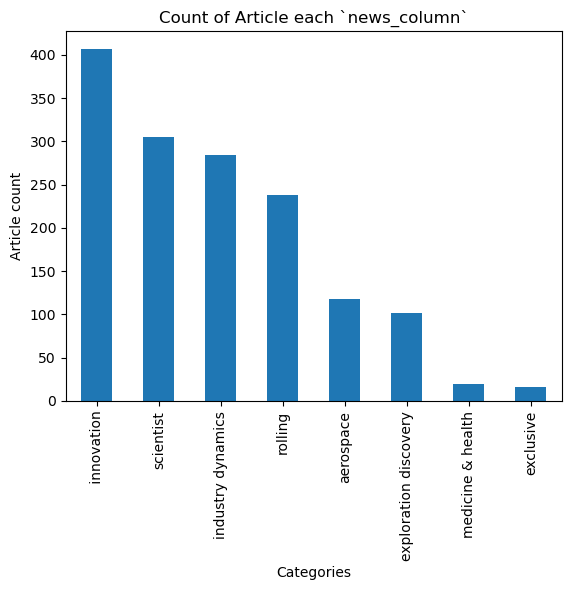

<Figure size 1024x512 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

news_column_count.plot.bar()

plt.xlabel('Categories')
plt.ylabel('Article count')
plt.title('Count of Article each `news_column`')
plt.xticks(rotation=90)
plt.figure(figsize=(8, 4),dpi=128)
plt.show()


## Number of Articles Published Over Time

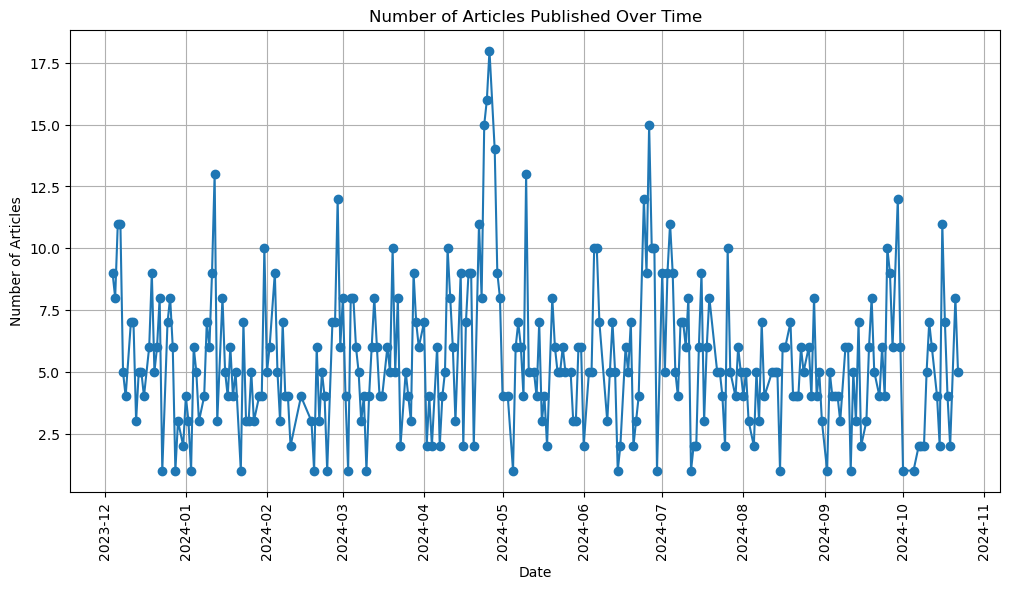

In [26]:
news['date'] = pd.to_datetime(news['date'])
news['date'] = news['date'].dt.date  # Keep only the date part

date_counts = news['date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
date_counts.plot(kind='line', marker='o')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.grid()
plt.show()

## Count of `article` by `news_column`

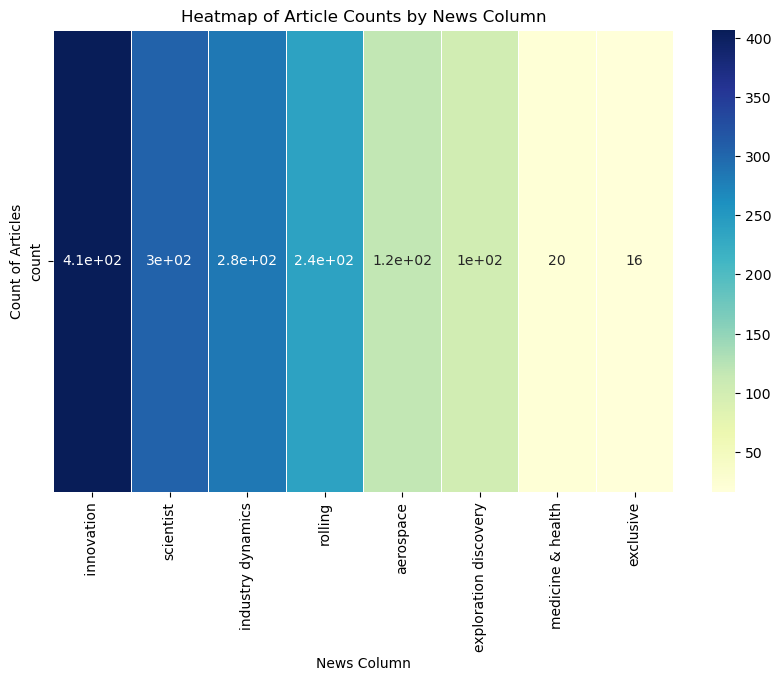

In [28]:
article_counts = news['news_column'].value_counts().reset_index()
article_counts.columns = ['news_column', 'count']

# Create a DataFrame for the heatmap
heatmap_data = article_counts.set_index('news_column')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, cmap='YlGnBu', linewidths=.5, cbar=True)
plt.title('Heatmap of Article Counts by News Column')
plt.xlabel('News Column')
plt.ylabel('Count of Articles')
plt.xticks(rotation= 90)
plt.show()

## Word Cloud of `article` column

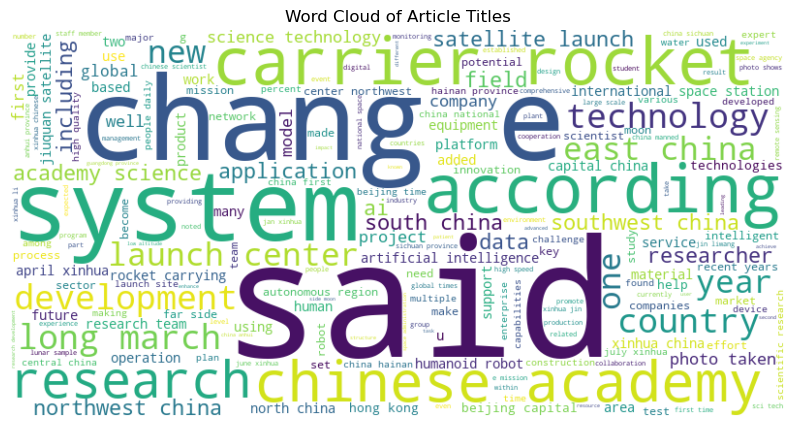

In [30]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(news['article']))

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Titles')
plt.show()

In [132]:
from collections import Counter
import pandas as pd

# Assuming news_dataset is your DataFrame
word_freq = Counter(" ".join(news['article']).split()).most_common(50)
word_freq_df = pd.DataFrame(word_freq, columns=['word', 'frequency'])
# print(word_freq_df)

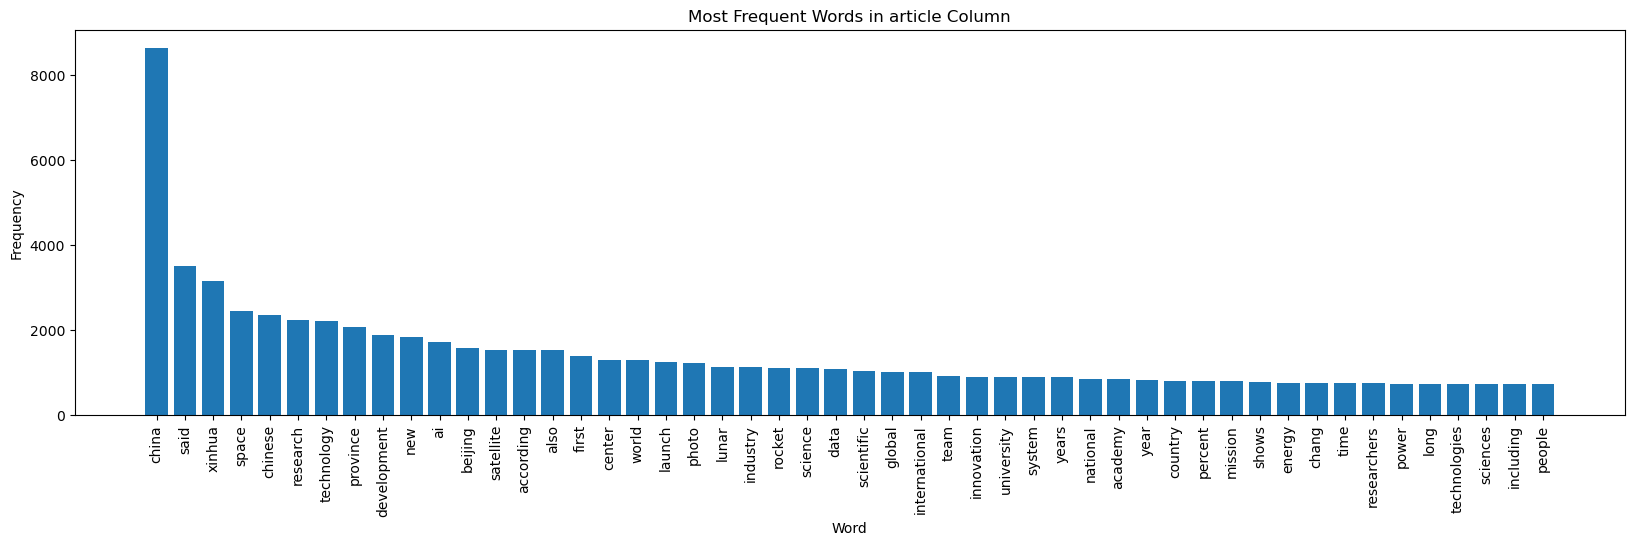

In [137]:
plt.figure(figsize=(20, 5))
plt.bar(word_freq_df['word'], word_freq_df['frequency'])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in article Column')
plt.xticks(rotation=90)
plt.show()

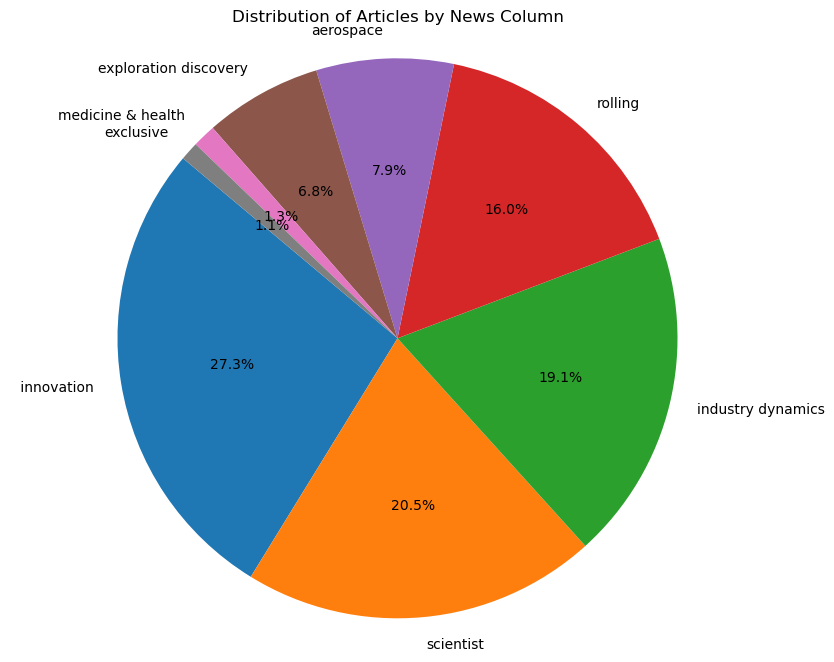

In [34]:

plt.figure(figsize=(10, 8))
plt.pie(news_column_counts, labels=news_column_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Articles by News Column')
plt.axis('equal')  
plt.show()